---
# Zillow Clustering Project 
---

<img src="https://1000logos.net/wp-content/uploads/2017/12/Zillow_logo_PNG2.png" alt="Zillow" title="Zillow Logo" width="400" height="200" />

---
## Executive Summary
---

**Goals:**
- Find predictors of Zestimate log error
- Construct a ML regression model that accurately predicts Zestimate log error
- Use clustering as part of exploration process

**Results:**
- Add results here

**Next Steps:**
- Add next steps here

---

### Data Dictionary

---
## Plan
---

- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x] Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- [x] Incorporate clustering into exploration process.
- [x] Establish a baseline accuracy and document well.
- [x] Train several different regression models.
- [x] Evaluate models on train and validate datasets.
- [x] Choose the model with that performs the best and evaluate that single model on the test dataset.
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.

---
## Acquire
---

In [1]:
# standard imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# sklearn imports
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# supress scientific notation
np.set_printoptions(suppress=True)

# Custom module imports
import wrangle as w
import explore as e
# import evaluate as ev 

In [2]:
# use function from wrangle module to acquire needed data, see wrangle.py for code
df = w.get_zillow_data()

In [3]:
df.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,transactiondate,id,...,censustractandblock,id,logerror,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14297519,2017-01-01,1727539,...,6.059063e+13,0,0.025595,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,NaN,NaN,NaN,17052889,2017-01-01,1387261,...,6.111001e+13,1,0.055619,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,NaN,NaN,NaN,14186244,2017-01-01,11677,...,6.059022e+13,2,0.005383,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,NaN,NaN,NaN,12177905,2017-01-01,2288172,...,6.037300e+13,3,-0.103410,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,NaN,NaN,1.0,10887214,2017-01-01,1970746,...,6.037124e+13,4,0.006940,Central,None,None,Central,Condominium,None,None


In [4]:
df.shape

(77381, 69)

In [5]:
# df.describe()

In [6]:
# df.info()

In [7]:
# fig, axs = plt.subplots(10, 5, sharey=False, figsize=(25, 50))
# axe = axs.ravel()
# for i, c in enumerate(df.select_dtypes('number').columns):
#     df[c].plot.hist(ax=axe[i],title=c, ec='black')
#     plt.tight_layout()

### Takeaways:
- Have some outliers/erroneous data in most columns
- Lots of nulls
- I am starting with a df with a shape of (77381, 69)
- Description of initial data pull:
    - Only properties from 2017
    - Only pulled records for most recent transaction date
    - Joined all possible tables to bring in all data available
    - Only pulled records where both latitude and longitude columns had values

---
## Prepare
---

### Clean

In [8]:
# use function to clean data, see wrangle.py for code
df = w.clean_zillow(df)
df.head()

,sale_date,bath_cnt,bed_cnt,sqft,latitude,longitude,lot_sqft,land_use_code,zoning_desc,total_rooms,year_built,assessed_value,census_tract_block,log_error,heating_system,land_use,county,sale_month,sale_week
0,2017-01-01,3.5,4,3100,33634931,-117869207,4506,122,LAR1,8,1998,1023282.0,060590630072012,0.025595,Central,Single Family Residential,Orange,1,52
2,2017-01-01,2.0,3,1243,33886168,-117823170,8432,122,LAR1,6,1962,564778.0,060590218022012,0.005383,Central,Single Family Residential,Orange,1,52
7,2017-01-01,1.0,2,738,34149214,-118239357,4214,0100,GLR4YY,3,1922,218552.0,060373020041001,0.101723,Central,Single Family Residential,Los Angeles,1,52
10,2017-01-02,3.0,4,2540,34434971,-118464390,10384,0101,SCUR2,8,1999,430108.0,060379200341014,0.005963,Central,Single Family Residential,Los Angeles,1,1
15,2017-01-02,2.5,3,1371,34238229,-119170633,3445,1111,LAR1,6,2004,198054.0,061110050041163,0.008669,Central,Single Family Residential,Ventura,1,1


In [9]:
df.shape

(41062, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41062 entries, 0 to 77380
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sale_date           41062 non-null  datetime64[ns]
 1   bath_cnt            41062 non-null  float64       
 2   bed_cnt             41062 non-null  int64         
 3   sqft                41062 non-null  int64         
 4   latitude            41062 non-null  int64         
 5   longitude           41062 non-null  int64         
 6   lot_sqft            41062 non-null  int64         
 7   land_use_code       41062 non-null  object        
 8   zoning_desc         41062 non-null  object        
 9   total_rooms         41062 non-null  int64         
 10  year_built          41062 non-null  int64         
 11  assessed_value      41062 non-null  float64       
 12  census_tract_block  41062 non-null  object        
 13  log_error           41062 non-null  float64   

#### Cleaning Performed:
- Dropped id columns
- Filtered to single-unit properties by using only `Single Family Residential`, `Mobile Home`, and `Manufactured, Modular, Prefabricated Homes` labels from `land_use` column
- Removed all `columns` with more than `50%` of data missing
- Removed all `rows` with more than `25%` missing
- Imputed missing `sqft` and `lot_sqft` values using median
- Imputed `zoning_desc`, `heating_system` values using mode
- Renamed `county` ids using names
- Dropped all remaining nulls
- Dropped other redundant columns and columns that didn't columns where values were all the same
- Fixed data types to be appropriate for info contained in each column
- Removed outliers using Tukey's Rule (1.5 * IQR)
- Renamed columns as necessary for readability
- Added `sale_month` and `sale_week` columns to be used in exploration

#### Takeaways:
- Current shape of data: (41062, 19)

---
### Split for Exploration

In [11]:
# split df for exploration
train_exp, val_exp, test_exp = w.split(df)
print(train_exp.shape, val_exp.shape, test_exp.shape)
print(train_exp.shape[0]/df.shape[0], val_exp.shape[0]/df.shape[0], test_exp.shape[0]/df.shape[0])
train_exp.head()

(32889, 19) (4066, 19) (4107, 19)
0.8009595246213044 0.09902099264526813 0.1000194827334275


,sale_date,bath_cnt,bed_cnt,sqft,latitude,longitude,lot_sqft,land_use_code,zoning_desc,total_rooms,year_built,assessed_value,census_tract_block,log_error,heating_system,land_use,county,sale_month,sale_week
14152,2017-03-02,3.0,4,2212,33614040,-117907805,4900,122,LAR1,7,1946,137274.0,060590634005023,0.034114,Central,Single Family Residential,Orange,3,9
46765,2017-06-15,3.0,4,2002,34192037,-118315270,7309,0100,BUR1*,8,1941,409818.0,060373106021010,-0.047764,Floor/Wall,Single Family Residential,Los Angeles,6,24
36185,2017-05-15,2.0,5,1982,33677214,-117952371,6000,122,LAR1,8,1964,334694.0,060590992162014,-0.019793,Central,Single Family Residential,Orange,5,20
52616,2017-06-30,3.0,5,2406,34651216,-118251613,10020,0101,LCRA10000*,9,1997,322000.0,060379012053008,-0.015435,Central,Single Family Residential,Los Angeles,6,26
11667,2017-02-23,2.0,3,1041,33935264,-117924937,5860,122,LAR1,6,1957,371706.0,060590014021007,-0.041416,Central,Single Family Residential,Orange,2,8


---
## Explore 
---

### Univariate

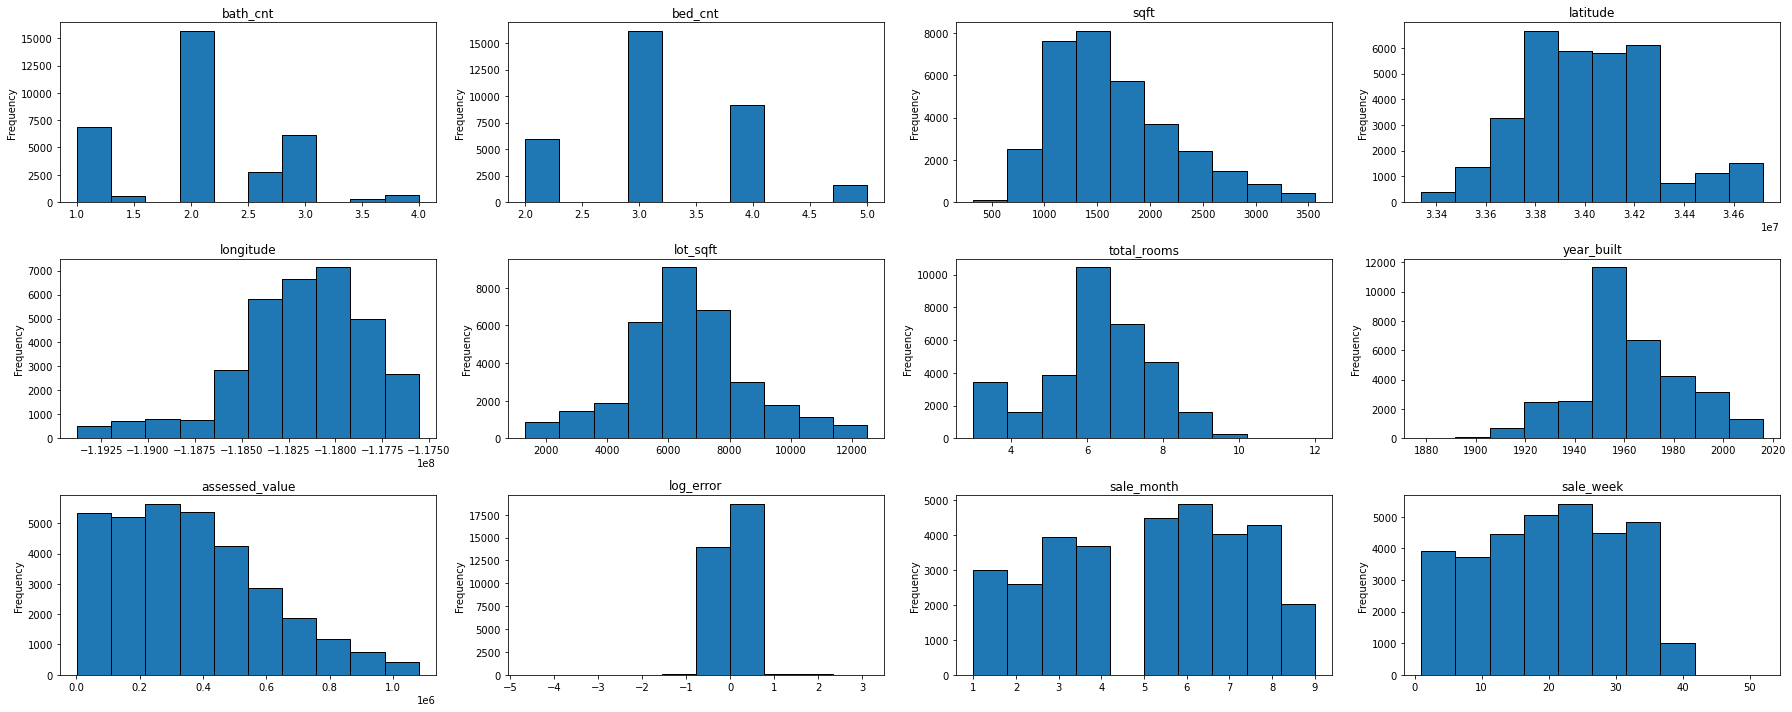

In [12]:
# let's take a look at the distributions of the continuous variables
fig, axs = plt.subplots(3, 4, sharey=False, figsize=(25, 10))
axe = axs.ravel()
for i, c in enumerate(train_exp.select_dtypes('number').columns):
    train_exp[c].plot.hist(ax=axe[i],title=c, ec='black')
    plt.tight_layout()

#### Takeaways:
- Some distributions look normal, some not as much
- Will use non-parametric tests moving forward

### Bivariate

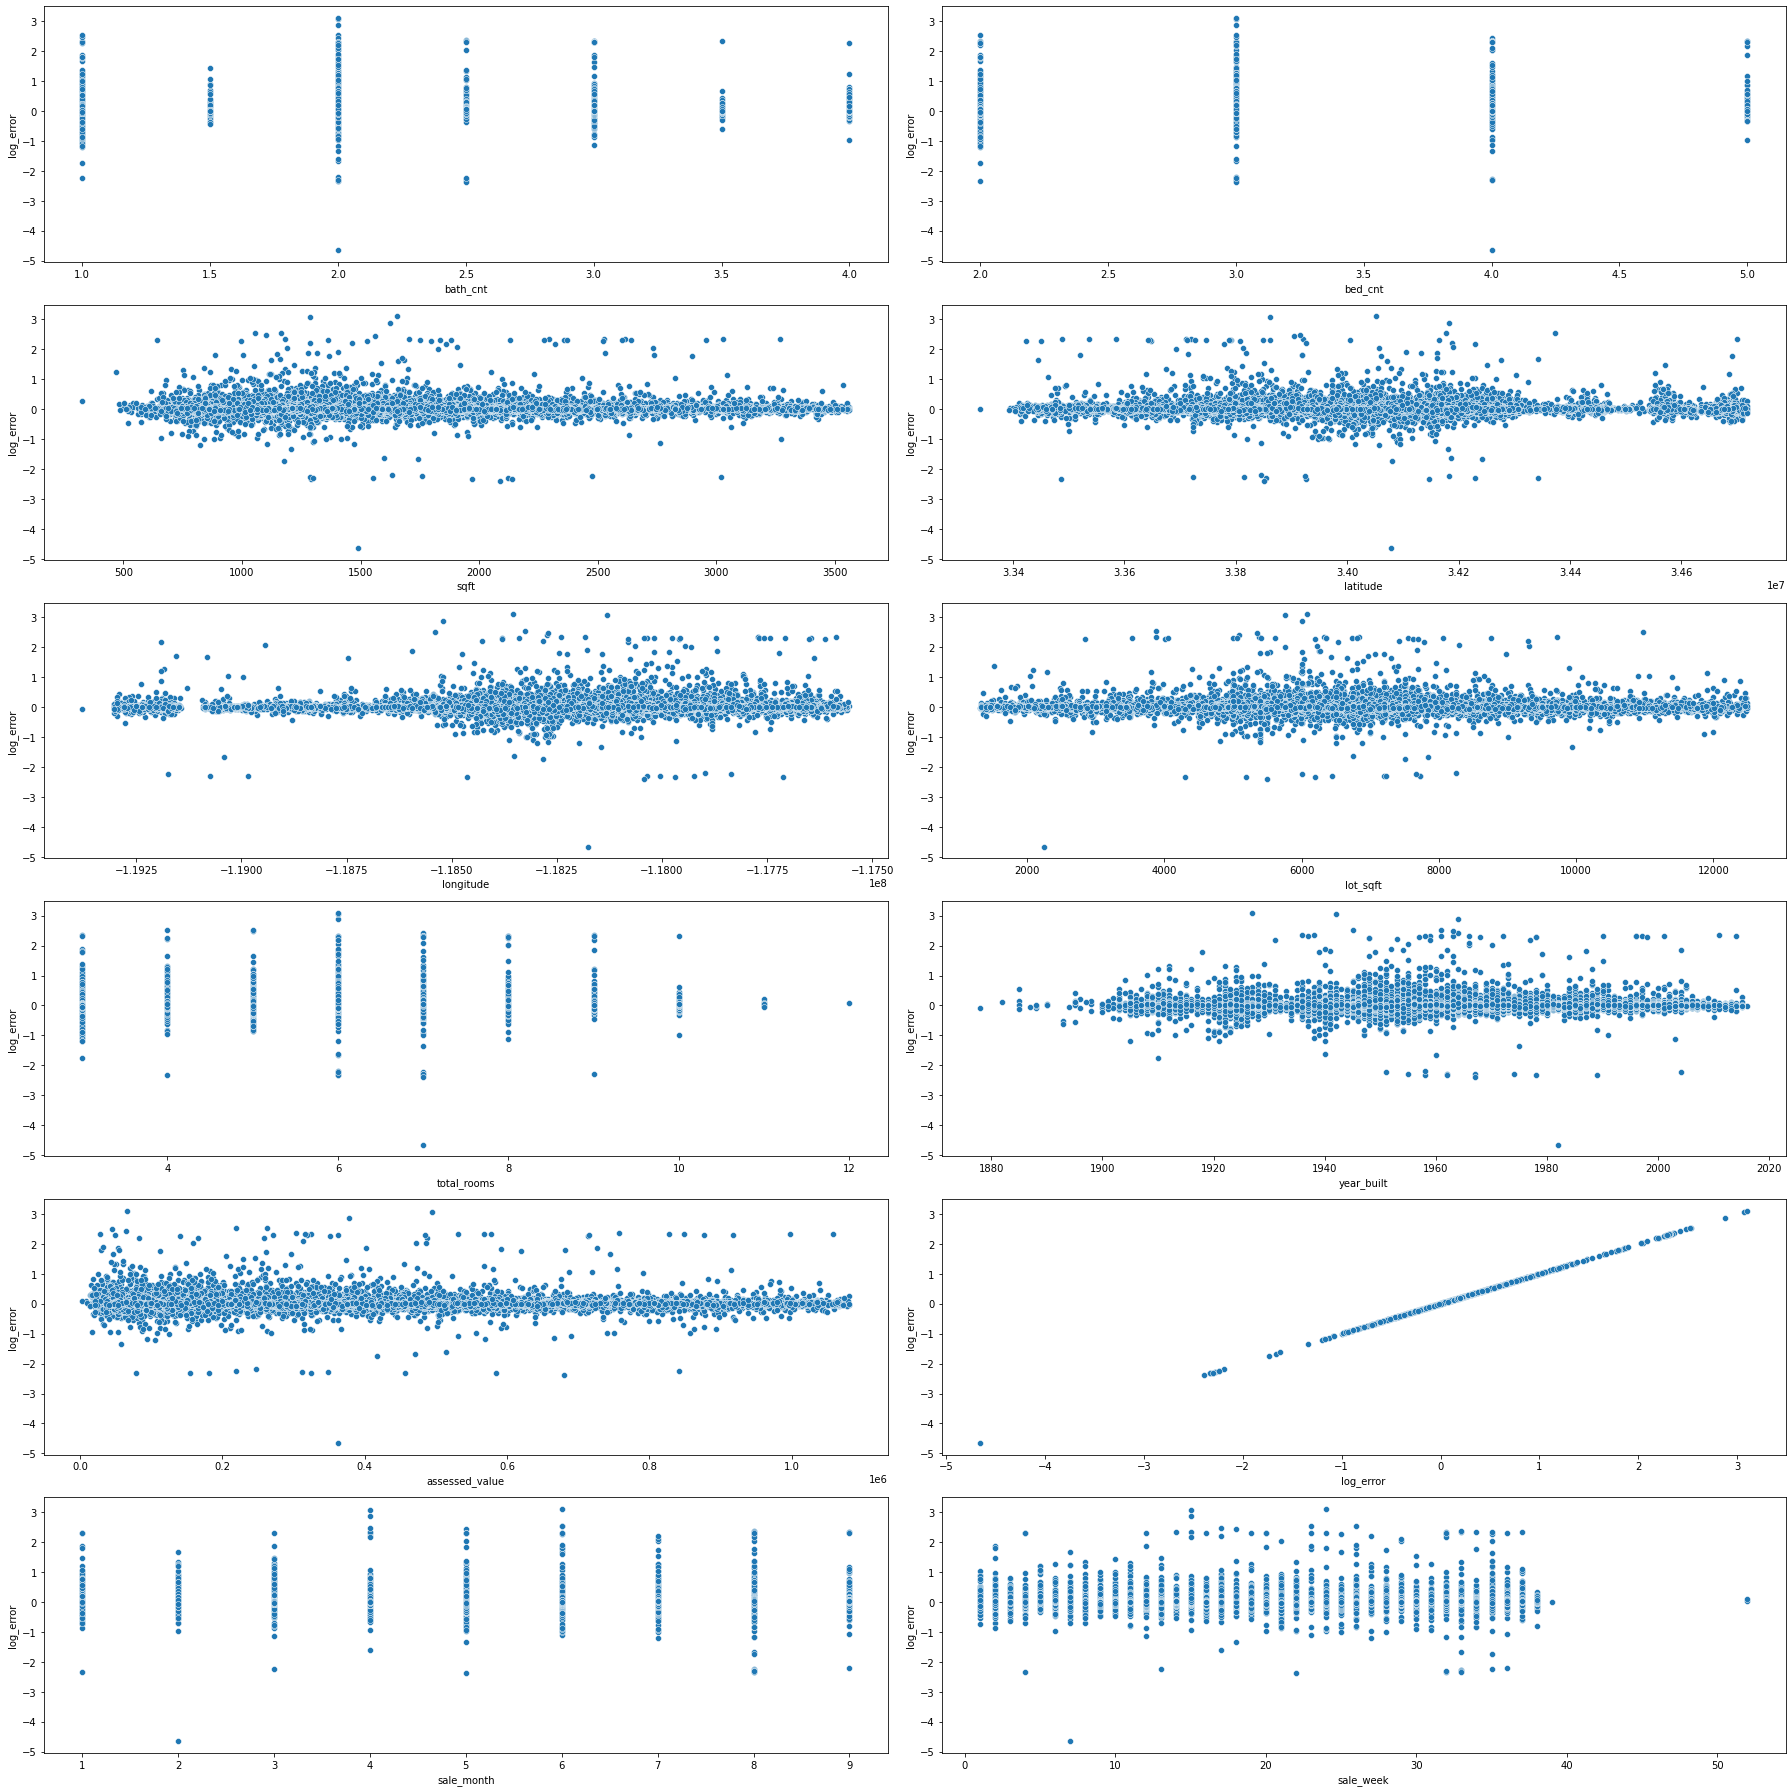

In [13]:
# let's take a look at all other continuous variables compared to target
fig, axs = plt.subplots(6, 2, sharey=False, figsize=(25, 25))
axe = axs.ravel()
for i, c in enumerate(train_exp.select_dtypes('number').columns):
    sns.scatterplot(x=train_exp[c], y=train_exp.log_error, ax=axe[i])
    plt.tight_layout()

#### Takeaways:
- There seems to be more error on smaller properties (< 2000 sf)
- There seems to be more error for smaller latitude (< 34.4$^{\circ}$ N)
- There seems to be more error for bigger longitude (> -118.5$^{\circ}$ W)
- There seems to be more error in mid-sized lots (between 5,000 and 8,000 sf)
- There are some groupings of larger error for year built (not easy to define ranges)
- Lower value homes seems to have more error (as house gets smaller, error seems to increase)
- We don't seems to have homes in our dataset that sold from Oct to Dec

### Multivariate

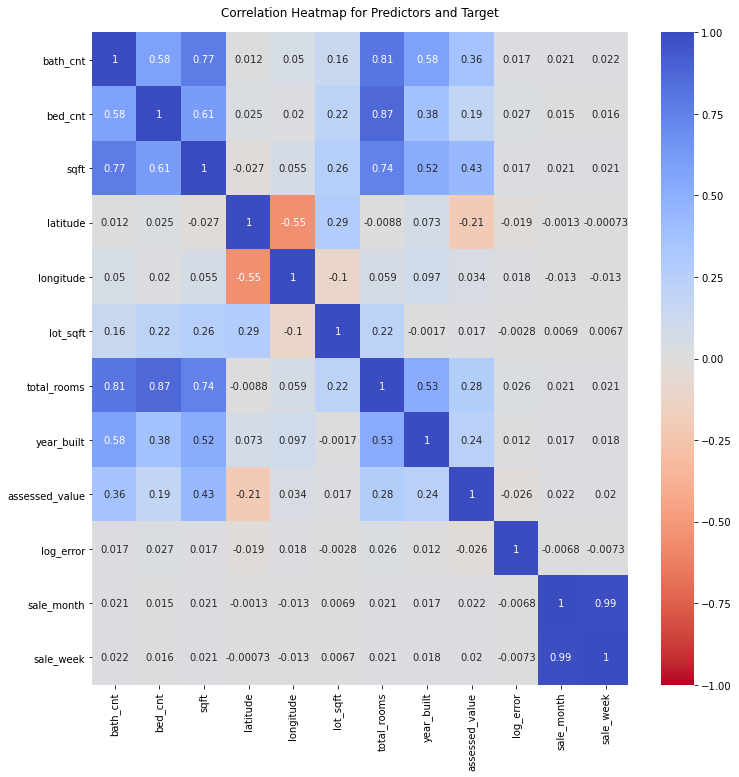

In [14]:
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(train_exp.corr(), annot=True, cmap='coolwarm_r', vmin=-1, vmax=1, center=0)
heatmap.set_title('Correlation Heatmap for Predictors and Target', pad=16);

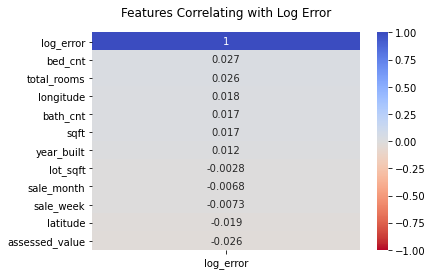

In [15]:
heatmap = sns.heatmap(train_exp.corr()[['log_error']].sort_values(by='log_error', ascending=False), annot=True, cmap='coolwarm_r', vmin=-1, vmax=1 );
heatmap.set_title('Features Correlating with Log Error', pad=16);

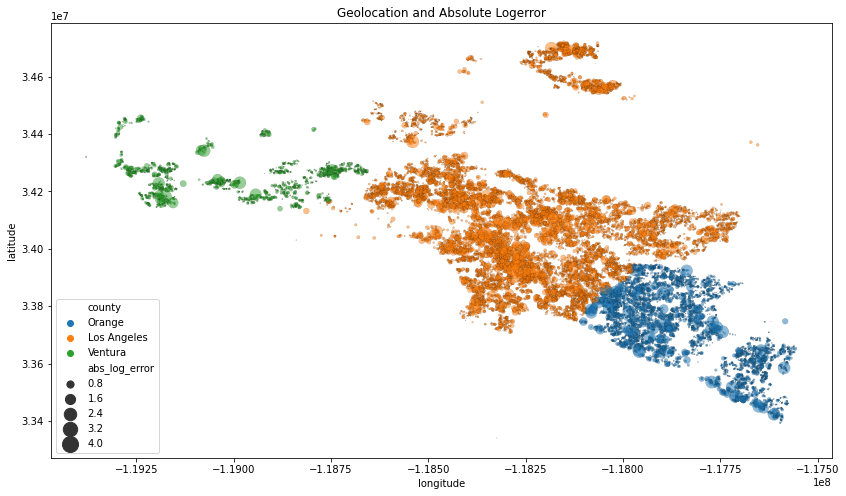

In [16]:
train_exp['abs_log_error'] = train_exp.log_error.apply(lambda x: x if x >= 0 else -x)
plt.figure(figsize=(14,8))
sns.scatterplot(x='longitude', y='latitude', hue='county', size='abs_log_error', sizes=(0,300), ec='black', linewidth=0.15, alpha=0.5, data=train_exp)
plt.legend()
plt.title('Geolocation and Absolute Logerror')
plt.show()

#### Takeaways:
- No variables are strongly correlated with target
- There appear to be some groupings of larger error in the plot of latitude, longitude, and log error

---
### Binning and Kruskal-Wallis Tests (non-parametric version of ANOVA)

1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

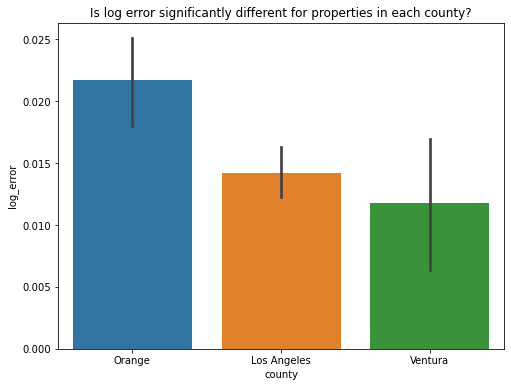

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(y=train_exp.log_error, x=train_exp.county);
plt.title('Is log error significantly different for properties in each county?');

**Hypotheses:**

$H_0$: there is no difference in log error for houses in different counties

$H_a$: there is no difference in log error for houses in different counties

In [18]:
stat, p = stats.kruskal(train_exp.log_error[train_exp.county == 'Los Angeles'], train_exp.log_error[train_exp.county == 'Orange'], train_exp.log_error[train_exp.county == 'Ventura'])

In [19]:
print(f'Kruskal-Wallis Test Results for county vs log error:\nTest Statistic: {stat:.2f}\nP-Value: {p:.3f}')

Kruskal-Wallis Test Results for county vs log error:
Test Statistic: 44.03
P-Value: 0.000


**Conclusions:**
- We reject the null, there is evidence of a difference in log error for houses in different counties since p < 0.05
- Post hoc comparisons between groups are required to determine which groups are different, but not needed for our purposed at this time

***Takeaway:***
- County is a driver of log error
- Including these bins as categories might improve model
- Might be more effective to create model for each county

---

2. Is sqft related to log error?

In [20]:
train_exp['sqft_bins'] = pd.cut(train_exp.sqft, [0, 1500, 2500, 4000])

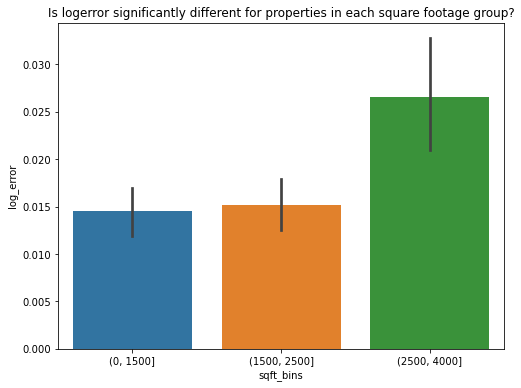

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(y=train_exp.log_error, x=train_exp.sqft_bins);
plt.title('Is logerror significantly different for properties in each square footage group?');

**Hypotheses:**

$H_0$: there is no difference in log error for houses in different square footage bins

$H_a$: there is no difference in log error for houses in different square footage bins

In [22]:
stat, p = stats.kruskal(train_exp.log_error[train_exp.sqft <= 1500], train_exp.log_error[(train_exp.sqft > 1500) & (train_exp.sqft <= 2500 )], train_exp.log_error[train_exp.sqft > 2500])

In [23]:
print(f'Kruskal-Wallis Test Results for county vs log error:\nTest Statistic: {stat:.2f}\nP-Value: {p:.3f}')

Kruskal-Wallis Test Results for county vs log error:
Test Statistic: 114.67
P-Value: 0.000


**Conclusions:**
- We reject the null, there is evidence of a difference in log error for houses in different square footage bins since p < 0.05
- Post hoc comparisons between groups are required to determine which groups are different, but not needed for our purposed at this time

***Takeaway:***
- Square footage bins are a driver of log error
- Including these bins as categories might improve model
- Might be more effective to create model for each bin

---

3. Is assessed value related to log error?

In [24]:
train_exp['assessed_value_bins'] = pd.cut(train_exp.assessed_value, [0, 250_000, 500_000, 1_500_000])

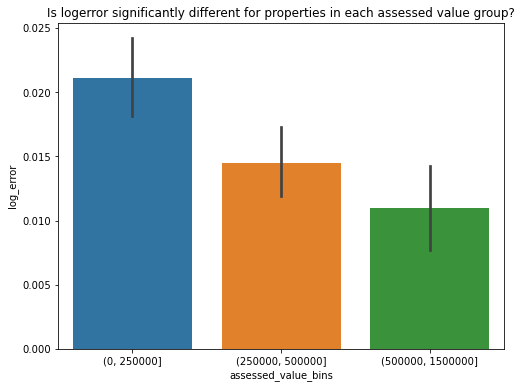

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(y=train_exp.log_error, x=train_exp.assessed_value_bins);
plt.title('Is logerror significantly different for properties in each assessed value group?');

**Hypotheses:**

$H_0$: there is no difference in log error for houses in different assessed value bins

$H_a$: there is no difference in log error for houses in different assessed value bins

In [26]:
stat, p = stats.kruskal(train_exp.log_error[train_exp.assessed_value <= 250_000], train_exp.log_error[(train_exp.assessed_value > 250_000) & (train_exp.assessed_value <= 500_000 )], train_exp.log_error[train_exp.assessed_value > 500_000])

In [27]:
print(f'Kruskal-Wallis Test Results for county vs log error:\nTest Statistic: {stat:.2f}\nP-Value: {p:.3f}')

Kruskal-Wallis Test Results for county vs log error:
Test Statistic: 22.94
P-Value: 0.000


**Conclusions:**
- We reject the null, there is evidence of a difference in log error for houses in different assessed value bins since p < 0.05
- Post hoc comparisons between groups are required to determine which groups are different, but not needed for our purposed at this time

***Takeaway:***
- Assessed value bins are a driver of log error
- Including these bins as categories might improve model
- Might be more effective to create model for each bin

---

4. Is year built related to log error?

In [28]:
train_exp['year_built_bins'] = pd.cut(train_exp.year_built, [0, 1950, 1970, 2020])

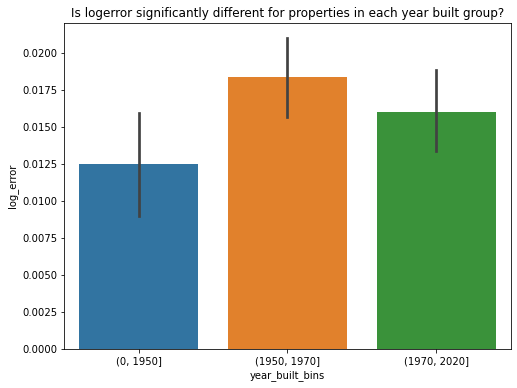

In [29]:
plt.figure(figsize=(8, 6))
sns.barplot(y=train_exp.log_error, x=train_exp.year_built_bins);
plt.title('Is logerror significantly different for properties in each year built group?');

**Hypotheses:**

$H_0$: there is no difference in log error for houses in different year built bins

$H_a$: there is no difference in log error for houses in different year built bins

In [30]:
stat, p = stats.kruskal(train_exp.log_error[train_exp.year_built <= 1950], train_exp.log_error[(train_exp.year_built > 1950) & (train_exp.year_built <= 1970 )], train_exp.log_error[train_exp.year_built > 1970])

In [31]:
print(f'Kruskal-Wallis Test Results for county vs log error:\nTest Statistic: {stat:.2f}\nP-Value: {p:.3f}')

Kruskal-Wallis Test Results for county vs log error:
Test Statistic: 37.88
P-Value: 0.000


**Conclusions:**
- We reject the null, there is evidence of a difference in log error for houses in different year built bins since p < 0.05
- Post hoc comparisons between groups are required to determine which groups are different, but not needed for our purposed at this time

***Takeaway:***
- Year built bins are a driver of log error
- Including these bins as categories might improve model
- Might be more effective to create model for each bin

---

5. Is total rooms related to log error?

In [32]:
train_exp['total_room_bins'] = pd.cut(train_exp.total_rooms, [0, 5, 7, 12])

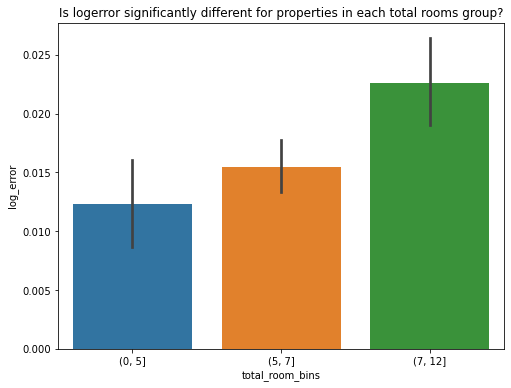

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(y=train_exp.log_error, x=train_exp.total_room_bins);
plt.title('Is logerror significantly different for properties in each total rooms group?');

**Hypotheses:**

$H_0$: there is no difference in log error for houses in different total rooms bins

$H_a$: there is no difference in log error for houses in different total rooms bins

In [34]:
stat, p = stats.kruskal(train_exp.log_error[train_exp.total_rooms <= 5], train_exp.log_error[(train_exp.total_rooms > 5) & (train_exp.total_rooms <= 7 )], train_exp.log_error[train_exp.total_rooms > 7])

In [35]:
print(f'Kruskal-Wallis Test Results for county vs log error:\nTest Statistic: {stat:.2f}\nP-Value: {p:.3f}')

Kruskal-Wallis Test Results for county vs log error:
Test Statistic: 76.53
P-Value: 0.000


**Conclusions:**
- We reject the null, there is evidence of a difference in log error for houses in different total rooms bins since p < 0.05
- Post hoc comparisons between groups are required to determine which groups are different, but not needed for our purposed at this time

***Takeaway:***
- Total rooms bins are a driver of log error
- Including these bins as categories might improve model
- Might be more effective to create model for each bin

---
### Encode, Scale, and Split for Modeling

In [36]:
# select columns to use for feature selection
mod_cols = df.select_dtypes('number').columns.tolist()
mod_cols.append('county')
# mod_cols.remove('log_error')
mod_cols

['bath_cnt',
 'bed_cnt',
 'sqft',
 'latitude',
 'longitude',
 'lot_sqft',
 'total_rooms',
 'year_built',
 'assessed_value',
 'log_error',
 'sale_month',
 'sale_week',
 'county']

In [37]:
df_modeling = df[mod_cols]
df_modeling.head()

,bath_cnt,bed_cnt,sqft,latitude,longitude,lot_sqft,total_rooms,year_built,assessed_value,log_error,sale_month,sale_week,county
0,3.5,4,3100,33634931,-117869207,4506,8,1998,1023282.0,0.025595,1,52,Orange
2,2.0,3,1243,33886168,-117823170,8432,6,1962,564778.0,0.005383,1,52,Orange
7,1.0,2,738,34149214,-118239357,4214,3,1922,218552.0,0.101723,1,52,Los Angeles
10,3.0,4,2540,34434971,-118464390,10384,8,1999,430108.0,0.005963,1,1,Los Angeles
15,2.5,3,1371,34238229,-119170633,3445,6,2004,198054.0,0.008669,1,1,Ventura


In [38]:
train_mod, val_mod, test_mod = w.encode_scale(df_modeling, MinMaxScaler(), 'log_error')

In [39]:
train_mod.head()

,log_error,county_Los Angeles,county_Orange,county_Ventura,bath_cnt_scaled,bed_cnt_scaled,sqft_scaled,latitude_scaled,longitude_scaled,lot_sqft_scaled,total_rooms_scaled,year_built_scaled,assessed_value_scaled,sale_month_scaled,sale_week_scaled
14152,0.034114,0,1,0,0.666667,0.666667,0.582998,0.198456,0.806379,0.320841,0.444444,0.492754,0.124352,0.250,0.156863
46765,-0.047764,1,0,0,0.666667,0.666667,0.518083,0.617983,0.582991,0.536315,0.555556,0.456522,0.377235,0.625,0.450980
36185,-0.019793,0,1,0,0.333333,1.000000,0.511901,0.244310,0.781946,0.419231,0.555556,0.623188,0.307531,0.500,0.372549
52616,-0.015435,1,0,0,0.666667,1.000000,0.642968,0.951268,0.617890,0.778801,0.666667,0.862319,0.295752,0.625,0.490196
11667,-0.041416,0,1,0,0.333333,0.333333,0.221020,0.431610,0.796987,0.406708,0.333333,0.572464,0.341873,0.125,0.137255


In [40]:
print(train_mod.shape, val_mod.shape, test_mod.shape)
print(train_mod.shape[0]/df.shape[0], val_mod.shape[0]/df.shape[0], test_mod.shape[0]/df.shape[0])

(32889, 15) (4066, 15) (4107, 15)
0.8009595246213044 0.09902099264526813 0.1000194827334275


---
### X and y

In [41]:
# split into X and y for all splits
X_train = train_mod.drop(columns='log_error')
y_train = train_mod.log_error
X_validate = val_mod.drop(columns='log_error')
y_validate = val_mod.log_error
X_test = test_mod.drop(columns='log_error')
y_test = test_mod.log_error

---
### Additional Feature Analysis

#### SelectKBest

In [42]:
len(X_train.columns)

14

In [43]:
e.select_kbest(X_train, y_train, 7)

['county_Orange',
 'bath_cnt_scaled',
 'bed_cnt_scaled',
 'latitude_scaled',
 'longitude_scaled',
 'total_rooms_scaled',
 'assessed_value_scaled']

#### RFE

In [44]:
e.show_rfe_feature_ranking(X_train, y_train)

county_Ventura            1
county_Los Angeles        2
county_Orange             3
assessed_value_scaled     4
sqft_scaled               5
latitude_scaled           6
sale_week_scaled          7
sale_month_scaled         8
bed_cnt_scaled            9
bath_cnt_scaled          10
lot_sqft_scaled          11
year_built_scaled        12
longitude_scaled         13
total_rooms_scaled       14
dtype: int64

---
## Explore using Clustering
---

---
## Model/Evaluate
---

### X and y

In [34]:
# split into X and y for all splits
X_train = train_scaled.drop(columns='appraised_value')
y_train = train_scaled.appraised_value
X_validate = validate_scaled.drop(columns='appraised_value')
y_validate = validate_scaled.appraised_value
X_test = test_scaled.drop(columns='appraised_value')
y_test = test_scaled.appraised_value

In [35]:
total = X_train.shape[0] + X_validate.shape[0] + X_test.shape[0]
print(f'Train Proportion: {(X_train.shape[0]/total):.2f}\nValidate Proportion: {(X_validate.shape[0]/total):.2f}\nTest Proportion: {(X_test.shape[0]/total):.2f}')

Train Proportion: 0.80
Validate Proportion: 0.10
Test Proportion: 0.10


### Target Distribution

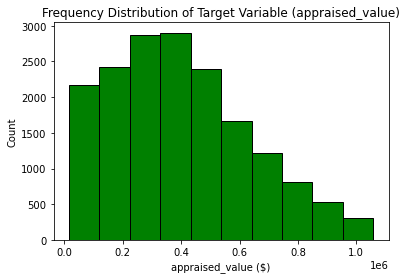

In [36]:
plt.hist(y_train, color='green', edgecolor='black')
plt.title('Frequency Distribution of Target Variable (appraised_value)')
plt.xlabel('appraised_value ($)')
plt.ylabel('Count');

***Doesn't look completely normal***

### Baseline

In [37]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# Predict baseline_mean
baseline_mean = y_train.appraised_value.mean()
y_train['baseline_mean'] = baseline_mean
y_validate['baseline_mean'] = baseline_mean

# Predict baseline_median
baseline_median = y_train.appraised_value.median()
y_train['baseline_median'] = baseline_median
y_validate['baseline_median'] = baseline_median

In [38]:
# create empty df to start appending to
metric_df = pd.DataFrame()

In [39]:
# get metrics for baseline mean model
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.baseline_mean, 
                           y_validate.appraised_value, 
                           y_validate.baseline_mean, 
                           'baseline_mean', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.4,0.0,0.0,-0.0


In [40]:
# get metrics for baseline median model
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.baseline_median, 
                           y_validate.appraised_value, 
                           y_validate.baseline_median, 
                           'baseline_median', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.0,-0.0
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.0,-0.0


### LinearRegression (OLS)

In [41]:
# make model
ols = LinearRegression(normalize=True)

# fit model
ols.fit(X_train, y_train.appraised_value)

# Make prediction for train and validate
y_train['ols_y_pred'] = ols.predict(X_train)
y_validate['ols_y_pred'] = ols.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.ols_y_pred, 
                           y_validate.appraised_value, 
                           y_validate.ols_y_pred, 
                           'OLS', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.0,-0.0
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.0,-0.0
2,OLS,209689.98,210815.95,-1125.96,0.2,0.2,0.0


### LassoLars

In [42]:
# create the model
lars = LassoLars(alpha=1)

# fit the model
lars.fit(X_train, y_train.appraised_value)

# predict train
y_train['lars_y_pred_alpha_1'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_1'] = lars.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.lars_y_pred_alpha_1, 
                           y_validate.appraised_value, 
                           y_validate.lars_y_pred_alpha_1, 
                           'lasso_alpha_1', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.0,-0.0
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.0,-0.0
2,OLS,209689.98,210815.95,-1125.96,0.2,0.2,0.0
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.2,0.2,0.0


In [43]:
# create the model
lars = LassoLars(alpha=2)

# fit the model
lars.fit(X_train, y_train.appraised_value)

# predict train
y_train['lars_y_pred_alpha_2'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_2'] = lars.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.lars_y_pred_alpha_2, 
                           y_validate.appraised_value, 
                           y_validate.lars_y_pred_alpha_2, 
                           'lasso_alpha_2', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.0,-0.0
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.0,-0.0
2,OLS,209689.98,210815.95,-1125.96,0.2,0.2,0.0
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.2,0.2,0.0
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.2,0.2,0.0


In [44]:
# create the model
lars = LassoLars(alpha=3)

# fit the model
lars.fit(X_train, y_train.appraised_value)

# predict train
y_train['lars_y_pred_alpha_3'] = lars.predict(X_train)

# predict validate
y_validate['lars_y_pred_alpha_3'] = lars.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.lars_y_pred_alpha_3, 
                           y_validate.appraised_value, 
                           y_validate.lars_y_pred_alpha_3, 
                           'lasso_alpha_3', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.0,-0.0
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.0,-0.0
2,OLS,209689.98,210815.95,-1125.96,0.2,0.2,0.0
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.2,0.2,0.0
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.2,0.2,0.0
5,lasso_alpha_3,209691.06,210829.32,-1138.26,0.2,0.2,0.0


###  TweedieRegressor (GLM)

In [45]:
# create the model
glm = TweedieRegressor(power=0, alpha=0)

# fit the model
glm.fit(X_train, y_train.appraised_value)

# predict train
y_train['glm_y_pred_normal'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_normal'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.glm_y_pred_normal, 
                           y_validate.appraised_value, 
                           y_validate.glm_y_pred_normal, 
                           'glm_normal', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.0,-0.0
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.0,-0.0
2,OLS,209689.98,210815.95,-1125.96,0.2,0.2,0.0
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.2,0.2,0.0
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.2,0.2,0.0
5,lasso_alpha_3,209691.06,210829.32,-1138.26,0.2,0.2,0.0
6,glm_normal,209688.57,210824.24,-1135.67,0.2,0.2,0.0


In [46]:
# create the model
glm = TweedieRegressor(power=1, alpha=0)

# fit the model
glm.fit(X_train, y_train.appraised_value)

# predict train
y_train['glm_y_pred_poisson'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_poisson'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.glm_y_pred_poisson, 
                           y_validate.appraised_value, 
                           y_validate.glm_y_pred_poisson, 
                           'glm_poisson', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.0,-0.00
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.0,-0.00
2,OLS,209689.98,210815.95,-1125.96,0.2,0.2,0.00
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.2,0.2,0.00
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.2,0.2,0.00
5,lasso_alpha_3,209691.06,210829.32,-1138.26,0.2,0.2,0.00
6,glm_normal,209688.57,210824.24,-1135.67,0.2,0.2,0.00
7,glm_poisson,209236.42,210927.54,-1691.12,0.2,0.2,0.01


In [47]:
# create the model
glm = TweedieRegressor(power=1.5, alpha=0)

# fit the model
glm.fit(X_train, y_train.appraised_value)

# predict train
y_train['glm_y_pred_poisson_gamma'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_poisson_gamma'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.glm_y_pred_poisson_gamma, 
                           y_validate.appraised_value, 
                           y_validate.glm_y_pred_poisson_gamma, 
                           'glm_poisson_gamma', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.00,-0.00
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.00,-0.00
2,OLS,209689.98,210815.95,-1125.96,0.2,0.20,0.00
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.2,0.20,0.00
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.2,0.20,0.00
5,lasso_alpha_3,209691.06,210829.32,-1138.26,0.2,0.20,0.00
6,glm_normal,209688.57,210824.24,-1135.67,0.2,0.20,0.00
7,glm_poisson,209236.42,210927.54,-1691.12,0.2,0.20,0.01
8,glm_poisson_gamma,209321.37,211061.03,-1739.66,0.2,0.19,0.01


In [48]:
# create the model
glm = TweedieRegressor(power=2, alpha=0)

# fit the model
glm.fit(X_train, y_train.appraised_value)

# predict train
y_train['glm_y_pred_gamma'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_gamma'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.glm_y_pred_gamma, 
                           y_validate.appraised_value, 
                           y_validate.glm_y_pred_gamma, 
                           'glm_gamma', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.00,-0.00
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.00,-0.00
2,OLS,209689.98,210815.95,-1125.96,0.2,0.20,0.00
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.2,0.20,0.00
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.2,0.20,0.00
5,lasso_alpha_3,209691.06,210829.32,-1138.26,0.2,0.20,0.00
6,glm_normal,209688.57,210824.24,-1135.67,0.2,0.20,0.00
7,glm_poisson,209236.42,210927.54,-1691.12,0.2,0.20,0.01
8,glm_poisson_gamma,209321.37,211061.03,-1739.66,0.2,0.19,0.01
9,glm_gamma,209430.43,211214.59,-1784.15,0.2,0.19,0.01


In [49]:
# create the model
glm = TweedieRegressor(power=3, alpha=0)

# fit the model
glm.fit(X_train, y_train.appraised_value)

# predict train
y_train['glm_y_pred_i_gauss'] = glm.predict(X_train)

# predict validate
y_validate['glm_y_pred_i_gauss'] = glm.predict(X_validate)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.glm_y_pred_i_gauss, 
                           y_validate.appraised_value, 
                           y_validate.glm_y_pred_i_gauss, 
                           'glm_i_gauss', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.0,0.00,-0.00
1,baseline_median,235844.69,237317.28,-1472.58,-0.0,0.00,-0.00
2,OLS,209689.98,210815.95,-1125.96,0.2,0.20,0.00
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.2,0.20,0.00
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.2,0.20,0.00
5,lasso_alpha_3,209691.06,210829.32,-1138.26,0.2,0.20,0.00
6,glm_normal,209688.57,210824.24,-1135.67,0.2,0.20,0.00
7,glm_poisson,209236.42,210927.54,-1691.12,0.2,0.20,0.01
8,glm_poisson_gamma,209321.37,211061.03,-1739.66,0.2,0.19,0.01
9,glm_gamma,209430.43,211214.59,-1784.15,0.2,0.19,0.01


### Polynomial Regression

#### PolynomialFeatures

In [50]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate
X_validate_degree2 = pf.transform(X_validate)

In [51]:
# make the polynomial features to get a new set of features
pf3 = PolynomialFeatures(degree=3)

# fit and transform X_train
X_train_degree3 = pf3.fit_transform(X_train)

# transform X_validate
X_validate_degree3 = pf3.transform(X_validate)

#### LinearRegression

In [52]:
# create the model
lm2 = LinearRegression(normalize=True)

# fit the model
lm2.fit(X_train_degree2, y_train.appraised_value)

# predict train
y_train['lm2_y_pred'] = lm2.predict(X_train_degree2)

# predict validate
y_validate['lm2_y_pred'] = lm2.predict(X_validate_degree2)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.lm2_y_pred, 
                           y_validate.appraised_value, 
                           y_validate.lm2_y_pred, 
                           'lm2', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.00,0.00,-0.00
1,baseline_median,235844.69,237317.28,-1472.58,-0.00,0.00,-0.00
2,OLS,209689.98,210815.95,-1125.96,0.20,0.20,0.00
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.20,0.20,0.00
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.20,0.20,0.00
5,lasso_alpha_3,209691.06,210829.32,-1138.26,0.20,0.20,0.00
6,glm_normal,209688.57,210824.24,-1135.67,0.20,0.20,0.00
7,glm_poisson,209236.42,210927.54,-1691.12,0.20,0.20,0.01
8,glm_poisson_gamma,209321.37,211061.03,-1739.66,0.20,0.19,0.01
9,glm_gamma,209430.43,211214.59,-1784.15,0.20,0.19,0.01


In [53]:
# create the model
lm3 = LinearRegression(normalize=True)

# fit the model
lm3.fit(X_train_degree3, y_train.appraised_value)

# predict train
y_train['lm3_y_pred'] = lm3.predict(X_train_degree3)

# predict validate
y_validate['lm3_y_pred'] = lm3.predict(X_validate_degree3)

# get metrics
metric_df = ev.make_metric_df(y_train.appraised_value, 
                           y_train.lm3_y_pred, 
                           y_validate.appraised_value, 
                           y_validate.lm3_y_pred, 
                           'lm3', 
                           metric_df)
metric_df

,model,RMSE_train,RMSE_validate,RMSE_diff,R2_train,R2_validate,R2_diff
0,baseline_mean,234166.35,235210.75,-1044.40,0.00,0.00,-0.00
1,baseline_median,235844.69,237317.28,-1472.58,-0.00,0.00,-0.00
2,OLS,209689.98,210815.95,-1125.96,0.20,0.20,0.00
3,lasso_alpha_1,209688.84,210825.36,-1136.52,0.20,0.20,0.00
4,lasso_alpha_2,209689.67,210827.06,-1137.38,0.20,0.20,0.00
5,lasso_alpha_3,209691.06,210829.32,-1138.26,0.20,0.20,0.00
6,glm_normal,209688.57,210824.24,-1135.67,0.20,0.20,0.00
7,glm_poisson,209236.42,210927.54,-1691.12,0.20,0.20,0.01
8,glm_poisson_gamma,209321.37,211061.03,-1739.66,0.20,0.19,0.01
9,glm_gamma,209430.43,211214.59,-1784.15,0.20,0.19,0.01


### Residual Plots

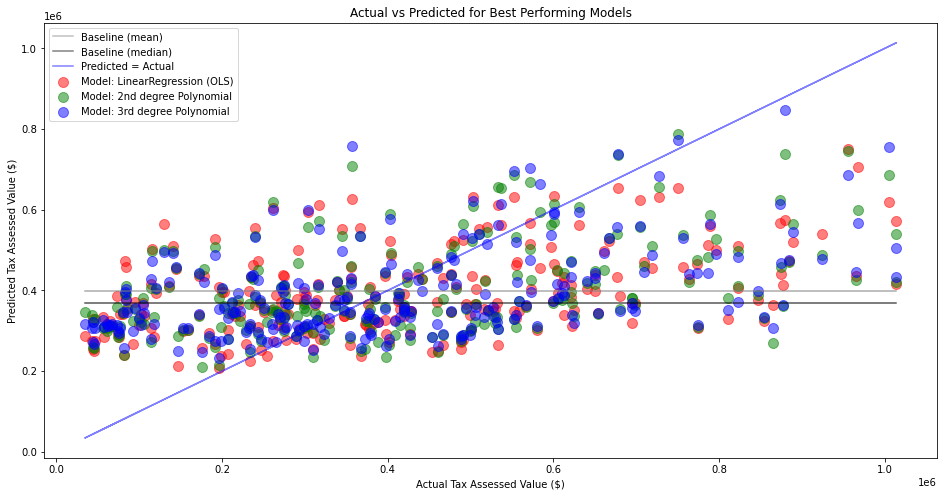

In [54]:
# create residual plots
# ols_y_pred, lm2_y_pred, lm3_y_pred
plt.figure(figsize=(16,8))
plt.plot(y_validate.appraised_value.sample(n=250, random_state=527), y_validate.baseline_mean.sample(n=250, random_state=527), alpha=.5, color="gray", label='Baseline (mean)')
plt.plot(y_validate.appraised_value.sample(n=250, random_state=527), y_validate.baseline_median.sample(n=250, random_state=527), alpha=.5, color="black", label='Baseline (median)')
plt.plot(y_validate.appraised_value.sample(n=250, random_state=527), y_validate.appraised_value.sample(n=250, random_state=527), alpha=.5, color="blue", label='Predicted = Actual')

plt.scatter(y_validate.appraised_value.sample(n=250, random_state=527), y_validate.ols_y_pred.sample(n=250, random_state=527), 
            alpha=.5, color="red", s=100, label="Model: LinearRegression (OLS)")
plt.scatter(y_validate.appraised_value.sample(n=250, random_state=527), y_validate.lm2_y_pred.sample(n=250, random_state=527), 
            alpha=.5, color="green", s=100, label="Model: 2nd degree Polynomial")
plt.scatter(y_validate.appraised_value.sample(n=250, random_state=527), y_validate.lm3_y_pred.sample(n=250, random_state=527), 
            alpha=.5, color="blue", s=100, label="Model: 3rd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Assessed Value ($)")
plt.ylabel("Predicted Tax Assessed Value ($)")
plt.title("Actual vs Predicted for Best Performing Models")
plt.show()

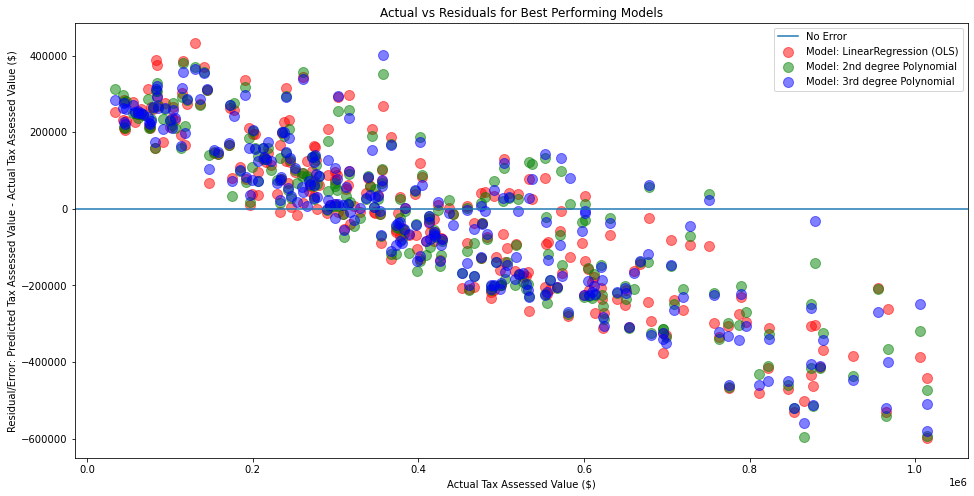

In [55]:
# ols_y_pred, lars_y_pred_alpha_1, lm2_y_pred, lm3_y_pred
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.appraised_value.sample(n=250, random_state=527), (y_validate.ols_y_pred - y_validate.appraised_value).sample(n=250, random_state=527), 
            alpha=.5, color="red", s=100, label="Model: LinearRegression (OLS)")
plt.scatter(y_validate.appraised_value.sample(n=250, random_state=527), (y_validate.lm2_y_pred - y_validate.appraised_value).sample(n=250, random_state=527), 
            alpha=.5, color="green", s=100, label="Model: 2nd degree Polynomial")
plt.scatter(y_validate.appraised_value.sample(n=250, random_state=527), (y_validate.lm3_y_pred - y_validate.appraised_value).sample(n=250, random_state=527), 
            alpha=.5, color="blue", s=100, label="Model: 3rd degree Polynomial")
plt.legend()
plt.xlabel("Actual Tax Assessed Value ($)")
plt.ylabel("Residual/Error: Predicted Tax Assessed Value - Actual Tax Assessed Value ($)")
plt.title("Actual vs Residuals for Best Performing Models")
plt.show()

### Actual vs. Predicted Distributions

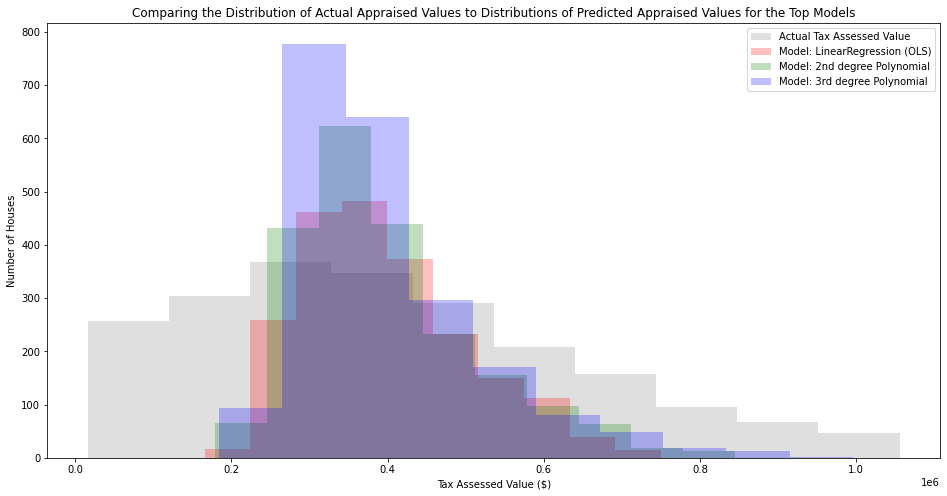

In [56]:
# plot to visualize actual vs predicted. 
# ols_y_pred, lars_y_pred_alpha_1, lm2_y_pred, lm3_y_pred
plt.figure(figsize=(16,8))
plt.hist(y_validate.appraised_value, color='gray', alpha=.25, label="Actual Tax Assessed Value")
plt.hist(y_validate.ols_y_pred, color='red', alpha=.25, label="Model: LinearRegression (OLS)")
plt.hist(y_validate.lm2_y_pred, color='green', alpha=.25, label="Model: 2nd degree Polynomial")
plt.hist(y_validate.lm3_y_pred, color='blue', alpha=.25, label="Model: 3rd degree Polynomial")
plt.xlabel("Tax Assessed Value ($)")
plt.ylabel("Number of Houses")
plt.title("Comparing the Distribution of Actual Appraised Values to Distributions of Predicted Appraised Values for the Top Models")
plt.legend()
plt.show()

### Evaluate Best-Performing Model on Test

In [57]:
y_test = pd.DataFrame(y_test)

# transform X_test
X_test_degree3 = pf3.transform(X_test)

# predict on test
y_test['lm3_y_pred'] = lm3.predict(X_test_degree3)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.appraised_value, y_test.lm3_y_pred, squared=False)
r2_test = explained_variance_score(y_test.appraised_value, y_test.lm3_y_pred)

print(f'RMSE for 3rd Degree Polynomial Regression\nOut-of-Sample Performance: {rmse_test:.2f}\nR^2: {r2_test:.2f}')

RMSE for 3rd Degree Polynomial Regression
Out-of-Sample Performance: 204074.85
R^2: 0.20


**Compare to Baseline:**

In [58]:
print(f'Model outperformed best baseline:\nRMSE difference: ${(235210.75 - rmse_test):.2f}\nR^2 difference: {r2_test:.2f}')

Model outperformed best baseline:
RMSE difference: $31135.90
R^2 difference: 0.20


## Conclusions and Next Steps

**Results:**
- Best predictors discovered were county, number of bedrooms, number of bathrooms, and square footage
- Best-peforming model outperformed baseline and increased $R^2$ value by 20%

**Next Steps:**
- Improve model performance by adding additional, more predictive features to the model
    - ZIP code
    - Neighborhood
    - Garage count
    - Pool info
    - Etc.